# Scraping Tweets using Python

In [3]:
import pandas as pd
import tweepy

tweepy.__version__

'3.6.0'

## Authentication

In [4]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [5]:

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Access Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True)
api

## Get tweets from user timeline

In [10]:
tweets_user = api.user_timeline('narendramodi', count=100)
len(tweets_user)

100

In [11]:
type(tweets_user)

tweepy.models.ResultSet

In [29]:
tweets = pd.DataFrame(columns=['id', 'created_at', 'likes',
                              'retweets', 'text', 'source'])

for tweet in tweets_user:
    #print(tweet.id, tweet.created_at, tweet.favorite_count, tweet.retweet_count,
    #     tweet.text, tweet.source)
    curr_tweet = {'id': tweet.id,
                 'created_at': tweet.created_at,
                 'likes': tweet.favorite_count,
                 'retweets': tweet.retweet_count,
                 'text': tweet.text,
                 'source': tweet.source}
    tweets = tweets.append(curr_tweet, ignore_index=True)
tweets['created_at'] = tweets['created_at'].astype(str)
tweets['created_at'] = pd.to_datetime(tweets['created_at'],
                                      format='%Y-%m-%d %H:%M:%S')
tweets.to_csv('modi_tweets.csv', index=False)

In [30]:
tweets.head()

,id,created_at,likes,retweets,text,source
0,1045882195213262849,2018-09-29 03:45:21,1400,341,Looking forward to interacting with BJP Karyak...,Twitter for Android
1,1045881287649742848,2018-09-29 03:41:45,1850,449,"At 10 AM this morning, I will inaugurate the '...",Twitter for Android
2,1045686311338692609,2018-09-28 14:46:59,9950,2060,"At Jodhpur's Konark War Memorial, paid homage ...",Twitter Web Client
3,1045685746516951040,2018-09-28 14:44:44,7159,1662,"Today in Jodhpur, I attended the Combined Comm...",Twitter Web Client
4,1045685265312837632,2018-09-28 14:42:49,6137,1656,This video makes me happy- because of the stup...,Twitter Web Client


In [25]:
tweets['created_at'] = tweets['created_at'].astype(str)
tweets['created_at'].head()

0    2018-09-29 03:45:21
1    2018-09-29 03:41:45
2    2018-09-28 14:46:59
3    2018-09-28 14:44:44
4    2018-09-28 14:42:49
Name: created_at, dtype: object

In [26]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'],
                                      format='%Y-%m-%d %H:%M:%S')
tweets['created_at'].head()

0   2018-09-29 03:45:21
1   2018-09-29 03:41:45
2   2018-09-28 14:46:59
3   2018-09-28 14:44:44
4   2018-09-28 14:42:49
Name: created_at, dtype: datetime64[ns]

In [28]:
tweets['created_at'].min(), tweets['created_at'].max() 

(Timestamp('2018-09-20 13:59:31'), Timestamp('2018-09-29 03:45:21'))

In [32]:
tweets.index = tweets['created_at']
#tweets.head()

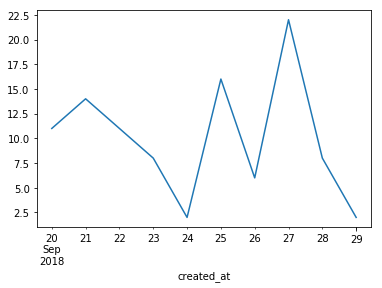

In [54]:
%matplotlib inline
tweets.resample('1D')['id'].count().plot.line()

In [56]:
tweets.to_csv('modi_tweets.csv', index=False)

In [59]:
os.getcwd()

'/Users/skathirmani/Documents/jupyter-notebooks/python'

### Text Analysis

![modi](modi-wordcloud.png)

## Search tweets from a hashtag

In [55]:
tweets_datascience = api.search('#olacabs', count=500)
len(tweets_datascience)

90

## Convert tweets to data frame

In [27]:
tweets_df = pd.DataFrame(columns=['text', 'retweets', 'likes', 'user', 'screen_name'])
for tweet in list(tweets_datascience):
    tweet_series = pd.Series({'text': tweet.text, 'date': tweet.created_at,
                          'retweets': tweet.retweet_count,
                          'likes': tweet.favorite_count,
                          'user': tweet.user.name,
                          'screen_name': tweet.user.screen_name})
    tweets_df = tweets_df.append(tweet_series, ignore_index=True)
tweets_df.head()

,text,retweets,likes,user,screen_name,date
0,RT @MikeQuindazzi: 4 layers of a #DigitalTrans...,26,0,Grace Churchill,IoTBigData,2018-07-30 18:19:40
1,No-U-Turn sampler https://t.co/pdB1vXoVau #dat...,0,0,Amit Kothiyal🇮🇳,tisamit,2018-07-30 18:19:30
2,RT @FrRonconi: #AI in the Factory of the #Futu...,4,0,LuckyTech,Lucky62058333,2018-07-30 18:19:27
3,RT @R_Demidchuk: Plataformas #IoT: escenario a...,7,0,Network Outsight,NetworkOutsight,2018-07-30 18:19:25
4,RT @KirkDBorne: HT @DeepLearn007 :\n#AI in the...,60,0,Rui Adam,Rui_Adam1,2018-07-30 18:19:12
